In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt

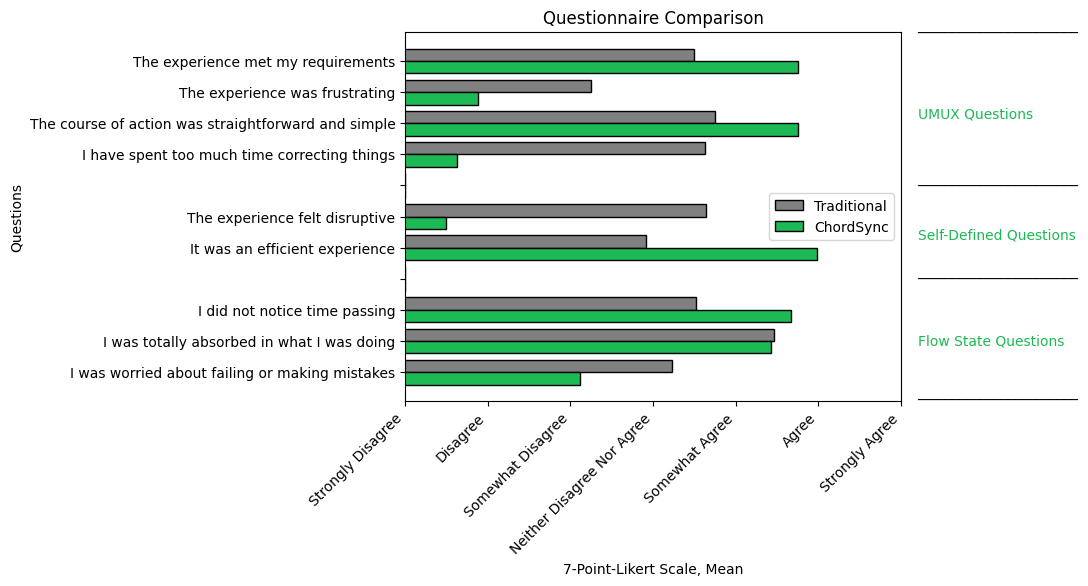

In [6]:
"""
-> UMUX-Lite:
Scale from 1 - 7 
(1 = Strongly Disagree, 2 = Disagree, 3 = Somewhat Disagree, 4 = Neither Disagree Nor Agree, 5 = Somewhat Agree, 6 = Agree, 7 = Strongly Agree)
Mapped to the values 13, 14, 15, 16, 17, 18, 19

1: The experience met my requirements	
2: The experience was frustrating	
3: The course of action was straightforward and simple	
4: I have spent too much time correcting things	

-> Two selfdefined Questions:
Slider from 1 - 100 with guide:
Strongly Disagree, Disagree, Somewhat Disagree, Neither Disagree Nor Agree, Somewhat Agree, Agree, Strongly Agree

-> Three Questions based on Flow State Scale:
Analog to selfdefined questions

"""
# UMUX
traditional_1_mean = 16.5
traditional_2_mean = 15.25
traditional_3_mean = 16.75
traditional_4_mean = 16.63

chordsync_1_mean = 17.75
chordsync_2_mean = 13.88
chordsync_3_mean = 17.75
chordsync_4_mean = 13.63


# Self-defined (Map from 1-100 to 13-19)
traditional_5_mean_original = 61.00
traditional_6_mean_original = 49.00
traditional_5_mean_mapped = traditional_5_mean_original*(6/99)+(13-(6/99))
traditional_6_mean_mapped = traditional_6_mean_original*(6/99)+(13-(6/99))

chordsync_5_mean_original = 9.25
chordsync_6_mean_original = 83.25
chordsync_5_mean_mapped = chordsync_5_mean_original*(6/99)+(13-(6/99))
chordsync_6_mean_mapped = chordsync_6_mean_original*(6/99)+(13-(6/99))

# Flow state scale
traditional_7_mean_original = 59.13
traditional_8_mean_original = 74.63
traditional_9_mean_original = 54.38
traditional_7_mean_mapped = traditional_7_mean_original*(6/99)+(13-(6/99))
traditional_8_mean_mapped = traditional_8_mean_original*(6/99)+(13-(6/99))
traditional_9_mean_mapped = traditional_9_mean_original*(6/99)+(13-(6/99))

chordsync_7_mean_original = 78.13
chordsync_8_mean_original = 74.13
chordsync_9_mean_original = 35.88
chordsync_7_mean_mapped = chordsync_7_mean_original*(6/99)+(13-(6/99))
chordsync_8_mean_mapped = chordsync_8_mean_original*(6/99)+(13-(6/99))
chordsync_9_mean_mapped = chordsync_9_mean_original*(6/99)+(13-(6/99))


traditional_means = [traditional_1_mean, traditional_2_mean, traditional_3_mean, traditional_4_mean, 0,
                          traditional_5_mean_mapped, traditional_6_mean_mapped, 0,
                          traditional_7_mean_mapped, traditional_8_mean_mapped, traditional_9_mean_mapped]

chordsync_means = [chordsync_1_mean, chordsync_2_mean, chordsync_3_mean, chordsync_4_mean, 0,
                        chordsync_5_mean_mapped, chordsync_6_mean_mapped, 0,
                        chordsync_7_mean_mapped, chordsync_8_mean_mapped, chordsync_9_mean_mapped]

scale_values = [13, 14, 15, 16, 17, 18, 19]

seven_point_likert = [
    "Strongly Disagree",
    "Disagree",
    "Somewhat Disagree",
    "Neither Disagree Nor Agree",
    "Somewhat Agree",
    "Agree",
    "Strongly Agree"
]

X = [
    "The experience met my requirements",
    "The experience was frustrating",
    "The course of action was straightforward and simple",
    "I have spent too much time correcting things", "",
    
    "The experience felt disruptive",
    "It was an efficient experience", "",
    
    "I did not notice time passing",
    "I was totally absorbed in what I was doing",
    "I was worried about failing or making mistakes"
]

umux_lite_color = '#1DB954'
self_defined_color = '#1DB954'
flow_state_color = '#1DB954'

colors_traditional = ['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
colors_chordsync = [umux_lite_color, umux_lite_color, umux_lite_color, umux_lite_color, 'grey', self_defined_color, self_defined_color, 'grey', flow_state_color, flow_state_color, flow_state_color]

X.reverse()
colors_traditional.reverse()
colors_chordsync.reverse()

Y_axis = np.arange(len(X))

# SUS score aussrechnen (system usability scale)
# https://measuringu.com/umux-lite/
# How to Calculate the UMUX Score
# umux score aussrchen https://help.qualaroo.com/usability-metric-for-user-experience (scala von 1-7), auf scale mapping und dann halt scale relativ abziehen
# mit diesen scroe vergleichen, bzwl sehr relavante punkte direkt ansprechen
# Dependend/paired t-test (signifikanter unterschied zwischen den beiden systemen) (hier within-subject design) (wilcoxon signed rank test)
# https://testscience.org/measuring-usability/  (Formel für UMUX und SUS, beide machen und vgleichen)
labels = ['Flow State Questions', 'Self-Defined Questions', 'UMUX Questions', "_______________________"]
colors = [flow_state_color, self_defined_color, umux_lite_color]

plt.text(19.2, 8.3, labels[2], color=colors[2], va='center', ha='left')
plt.text(19.2, 4.4, labels[1], color=colors[1], va='center', ha='left')
plt.text(19.2, Y_axis[1], labels[0], color=colors[0], va='center', ha='left')

plt.text(19.2, 3.2, labels[3], color="black", va='center', ha='left')
plt.text(19.2, 6.2, labels[3], color="black", va='center', ha='left')

plt.text(19.2, -0.7, labels[3], color="black", va='center', ha='left')
plt.text(19.2, 11.1, labels[3], color="black", va='center', ha='left')


plt.barh(Y_axis + 0.2, np.maximum(traditional_means[::-1], 13), 0.4, label='Traditional', color=colors_traditional, edgecolor='black')
plt.barh(Y_axis - 0.2, np.maximum(chordsync_means[::-1], 13), 0.4, label='ChordSync', color=colors_chordsync, edgecolor='black')

plt.yticks(Y_axis, X, rotation=0, ha="right") 
plt.xticks(scale_values, seven_point_likert, rotation=45, ha="right")  # Rotate x-axis labels by 45 degrees
plt.xlim(13, 19)  # Set the minimum value for the x-axis

plt.xlabel("7-Point-Likert Scale, Mean")
plt.ylabel("Questions")
plt.title("Questionnaire Comparison")
plt.legend()
plt.show()


In [19]:
"""
Calculate UMUX Score
https://blucado.com/understanding-the-umux-a-guide-to-the-short-but-accurate-questionnaire/
Positively worded questions are 1 and 3
Negatively worded questions are 2 and 4

Mapped from 1 to 7 (Integer)
You will get a score between 0 and 100, this is the UMUX score
UMUX = ((Item_1 − 1) + (Item_3 − 1) + (7 − Item_2) + (7 − Item_4)) * (100/24)

Except for presenting the mean UMUX score of the system, usually the Standard Deviation and participants volume (sample size) are presented as well.
"""

"""
https://blucado.com/presenting-quantitative-usability-test-results/#the-laplaces-rule-of-succession
The Laplace’s Rule of Succession
Another way to present the results is answering the question “What is the probability that the next person, 
who will use the system, will rate it with at least good usability?”

Let’s try to answer that question:

For a system to have good usability that means that its SUS is more than 73. So:
"""

# Those are the values (Still mapped to 13-19)
traditional_1_mean = 16.5
traditional_2_mean = 15.25
traditional_3_mean = 16.75
traditional_4_mean = 16.63

chordsync_1_mean = 17.75
chordsync_2_mean = 13.88
chordsync_3_mean = 17.75
chordsync_4_mean = 13.63

# Mapped to 1-7 (everything -12)
traditional_1_mean_mapped = 4.5
traditional_2_mean_mapped = 3.25
traditional_3_mean_mapped = 4.75
traditional_4_mean_mapped = 4.63

chordsync_1_mean_mapped = 5.75
chordsync_2_mean_mapped = 1.88
chordsync_3_mean_mapped = 5.75
chordsync_4_mean_mapped = 1.63

traditional_1_mapped_all = [2, 6, 5, 3, 6, 6, 5, 3]
traditional_2_mapped_all = [5, 2, 3, 4, 3, 1, 3, 5]
traditional_3_mapped_all = [6, 5, 5, 5, 5, 5, 4, 4]
traditional_4_mapped_all = [6, 3, 6, 6, 6, 3, 5, 2]

chordsync_1_mapped_all = [5, 6, 6, 5, 7, 5, 7, 5]
chordsync_2_mapped_all = [2, 2, 3, 2, 1, 1, 2, 2]
chordsync_3_mapped_all = [6, 6, 5, 5, 6, 6, 7, 5]
chordsync_4_mapped_all = [1, 2, 2, 2, 1, 2, 2, 1]

UMUX_Traditional = ((traditional_1_mean_mapped - 1) + (traditional_3_mean_mapped - 1) + (7 - traditional_2_mean_mapped) + (7 - traditional_4_mean_mapped)) * (100/24)
UMUX_ChordSync = ((chordsync_1_mean_mapped - 1) + (chordsync_3_mean_mapped - 1) + (7 - chordsync_2_mean_mapped) + (7 - chordsync_4_mean_mapped)) * (100/24)

def umux_arr(x1, x2, x3, x4):
    every_umux_arr = []
    for i in range(0, 8):
        every_umux_arr.append(((x1[i] - 1) + (x3[i] - 1) + (7 - x2[i]) + (7 - x4[i])) * (100/24))
        
    return every_umux_arr
    

# https://testscience.org/measuring-usability/
print("The UMUX Score allows for comparison with the SUS Score")
umux_traditional_arr = umux_arr(traditional_1_mapped_all, traditional_2_mapped_all, traditional_3_mapped_all, traditional_4_mapped_all)
umux_traditional_arr_mean = statistics.mean(umux_traditional_arr)
umux_traditional_arr_sd = statistics.stdev(umux_traditional_arr)
umux_traditional_arr_min = min(umux_traditional_arr)
umux_traditional_arr_max = max(umux_traditional_arr)
print("UMUX Traditional Array of all 8 Part.: " + str(umux_traditional_arr))
print("UMUX Traditional Mean: " + str(umux_traditional_arr_mean))
print("UMUX Traditional SD: " + str(umux_traditional_arr_sd))
print("UMUX Traditional Min: " + str(umux_traditional_arr_min))
print("UMUX Traditional Max: " + str(umux_traditional_arr_max))

print("\n")

umux_chordsync_arr = umux_arr(chordsync_1_mapped_all, chordsync_2_mapped_all, chordsync_3_mapped_all, chordsync_4_mapped_all)
umux_chordsync_arr_mean = statistics.mean(umux_chordsync_arr)
umux_chordsync_arr_sd = statistics.stdev(umux_chordsync_arr)
umux_chordsync_arr_min = min(umux_chordsync_arr)
umux_chordsync_arr_max = max(umux_chordsync_arr)
print("UMUX ChordSync Array of all 8 Part.: " + str(umux_chordsync_arr))
print("UMUX ChordSync Mean: " + str(umux_chordsync_arr_mean))
print("UMUX ChordSync SD: " + str(umux_chordsync_arr_sd))
print("UMUX ChordSync Min: " + str(umux_chordsync_arr_min))
print("UMUX ChordSync Max: " + str(umux_chordsync_arr_max))

print("\n")

# The Laplace’s Rule of Succession
# https://blucado.com/presenting-quantitative-usability-test-results/#the-laplaces-rule-of-succession
"""
For a system to have good usability that means that its SUS is more than 73. So:
Go through all SUScores and assign as a “success” if the score is more than 73.
Count the number of “successes” and add 1
Divide that number by the total amount of participants plus two

Nochmal T-Test anschauen! für signifikanz und vergleichbarkeit
"""
print("The probability of the system to be rated with good usability is:")
umux_traditional_laplace = ("SUCCESS", 2), ("FAIL", 6)
umux_traditional_laplace_prop = ((2+1)/(8+2)) * 100
print("UMUX Traditional Laplace: " + str(umux_traditional_laplace_prop) + "%")

umux_chordsync_laplace = ("SUCCESS", 8), ("FAIL", 0)
umux_chordsync_laplace_prop = ((8+1)/(8+2)) * 100
print("UMUX ChordSync Laplace: " + str(umux_chordsync_laplace_prop) + "%")

The UMUX Score allows for comparison with the SUS Score
UMUX Traditional Array of all 8 Part.: [37.5, 75.0, 54.16666666666667, 41.66666666666667, 58.333333333333336, 79.16666666666667, 54.16666666666667, 50.0]
UMUX Traditional Mean: 56.25
UMUX Traditional SD: 14.604576364744402
UMUX Traditional Min: 37.5
UMUX Traditional Max: 79.16666666666667


UMUX ChordSync Array of all 8 Part.: [83.33333333333334, 83.33333333333334, 75.0, 75.0, 95.83333333333334, 83.33333333333334, 91.66666666666667, 79.16666666666667]
UMUX ChordSync Mean: 83.33333333333334
UMUX ChordSync SD: 7.386710503565989
UMUX ChordSync Min: 75.0
UMUX ChordSync Max: 95.83333333333334


The probability of the system to be rated with good usability is:
UMUX Traditional Laplace: 30.0%
UMUX ChordSync Laplace: 90.0%
